# Heart disease Database

Predict whether the patient has 10-year risk of future coronary heart disease (CHD).
Target: 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)



changing the working Directery

In [1]:
import os
os.chdir(r'C:\Desktop\Data Science\Machin Learning\project')
os.getcwd()

'C:\\Desktop\\Data Science\\Machin Learning\\project'

In [2]:
# Removing/filtering unwanted warnings
import warnings
warnings.filterwarnings('ignore')

Above code use to remove unnecessary warnings through out the project

# Imported required libraries

In [3]:
# Importing the numpy and pandas package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (34.6 MB)
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248514 sha256=8abd197f0030cb72859ed704ad081b81992d2e65750acd0c7fa63c3066324395
  Stored in directory: C:\Users\nilak\AppData\Local\Temp\pip-ephem-wheel-cache-62dnq8bc\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling


# Reading Dataset

In [4]:
df=pd.read_csv(r"C:\Desktop\Data Science\Machin Learning\project\framingham.csv")

# Data Exploration

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Top five rows of the dataset shown here

In [6]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


Since my target column name is not appropriate, let's rename the column

In [7]:
#I just want rename the following column
df=df.rename(columns={'male':'sex','TenYearCHD':'Result'})
df.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Result'],
      dtype='object')

Last 5 rows of the dataset shown here

In [8]:
df.shape

(4240, 16)

We have 4240 rows and 16 columns in the datase

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  Result           4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In 16 columns 9 columns are float  and rest of them are integer.  


# Dataset Pre-Processing

After carefully understanding the dataset, I can say education does not affect someone's risk of heart diseases. So I can remove the that column and will make my work easier.

In [10]:
# Dropping the education column
df= df.drop("education",axis=1)

In [11]:
#confirming education column was removed
df.head(5)

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Result
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Missing Values

In [12]:
df.isnull().sum()

sex                  0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Result               0
dtype: int64

We can either delete those null value records (because all are less than 10%) or we can substitute those null values with the mean values of each column. So that we dont loose data.

In [13]:
# Instead of deleting those null records, we are replacing the null values with 'mean()'

for value in ['cigsPerDay', 'BPMeds','BMI','totChol','heartRate','glucose']:
    df[value].fillna(round(df[value].mean()), inplace= True)

In [14]:
# Rechecking for null values.
df.isnull().sum()

sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Result             0
dtype: int64

# Checking Outliers

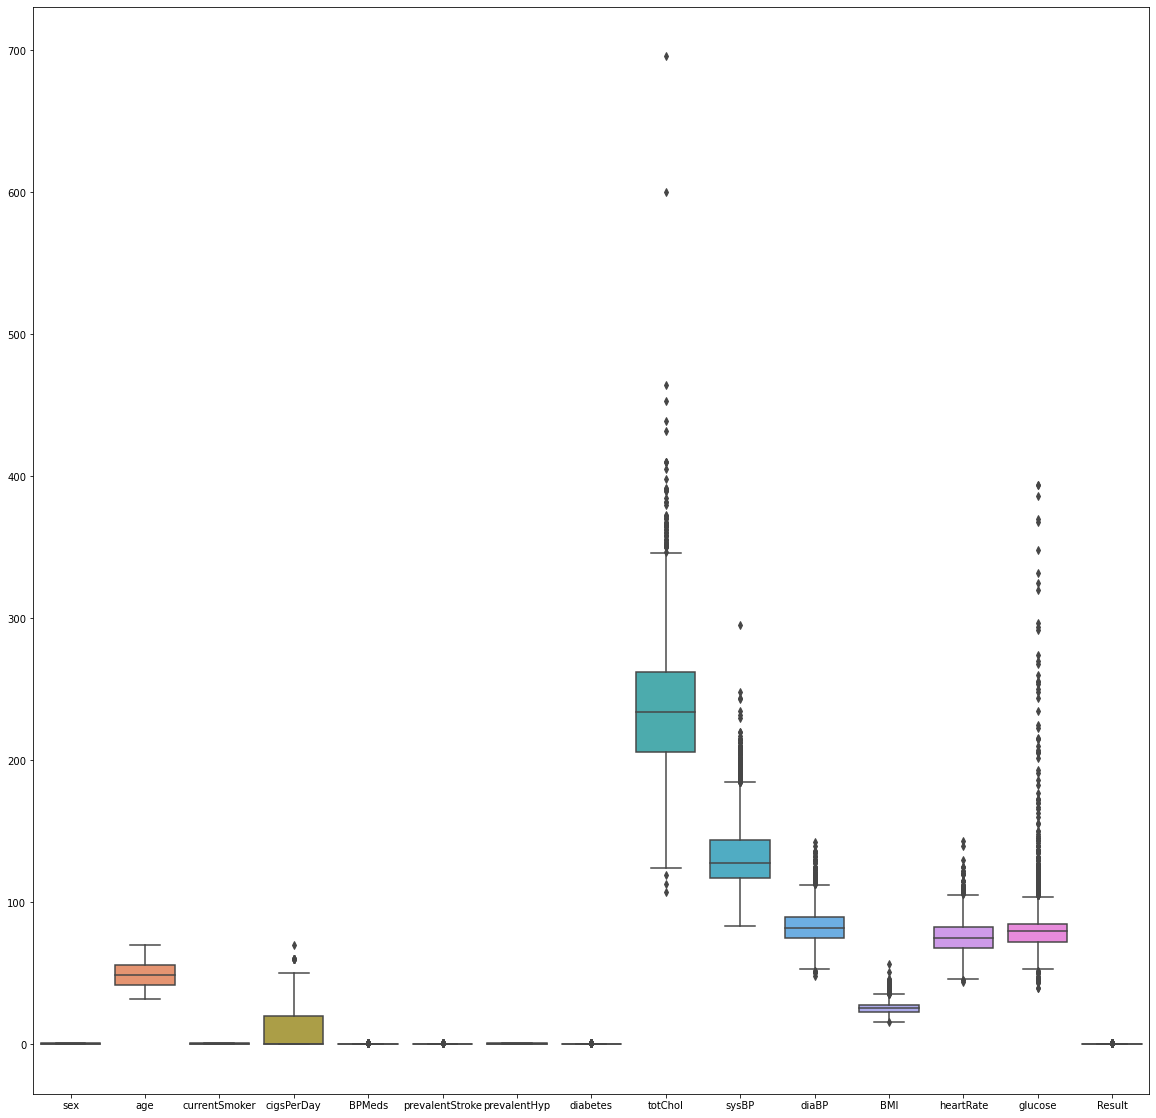

In [15]:
# To Rechecking for outliers, we are plotting a box-whisker plot.

plt.figure(figsize=(20,20), facecolor='w')
sns.boxplot(data=df)
plt.show()

Pictures shows potential outliers of some columns. As per the picture cigsPerDaya,BPMeds,prevalentStroke,diabetes,totChol,
sysBP,diaBP,BMI,heartRate,glucose,Result have outliers. we know  my target column is TenYearCHD. which represent value 1 is interpreted as "tested positive for diabetes" and value 0 interpreted as "tested negative for diabetes"


In [16]:
df['Result'].describe()

count    4240.000000
mean        0.151887
std         0.358953
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Result, dtype: float64

<AxesSubplot:ylabel='Result'>

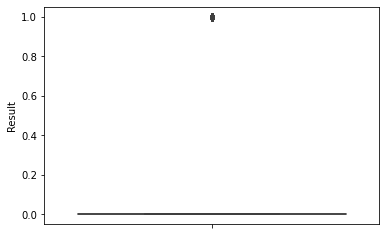

In [17]:
sns.boxplot( y=df['Result'] )

In [18]:
#lower inner fence: Q1 - 1.5*IQR
#upper inner fence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)#UIF=upper inner fence
    LIF=Q1-1.5*(IQR) #LIF=lower inner fence
    df_out =df[(df[col]<LIF) | (df[col]>UIF)] # I created a new data set that has just include potential outliers
    sns.distplot(df_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return df_out[col] .describe()

count    644.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Result, dtype: float64

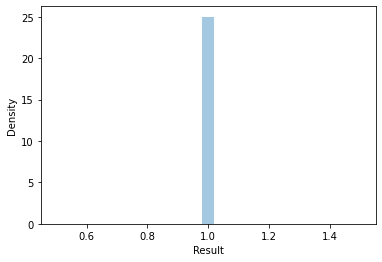

In [19]:
outlier_analysis('Result')

count    12.000000
mean     60.833333
std       2.886751
min      60.000000
25%      60.000000
50%      60.000000
75%      60.000000
max      70.000000
Name: cigsPerDay, dtype: float64

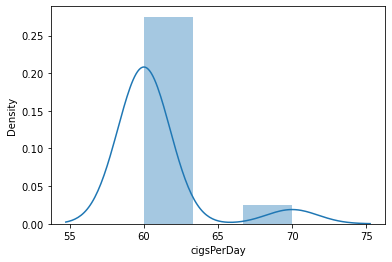

In [20]:
outlier_analysis('cigsPerDay')

count    124.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: BPMeds, dtype: float64

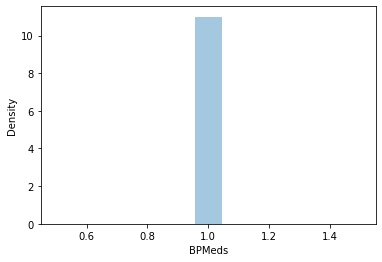

In [21]:
outlier_analysis('BPMeds')

count    25.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: prevalentStroke, dtype: float64

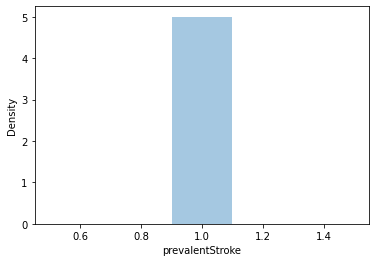

In [22]:
outlier_analysis('prevalentStroke')

count    109.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: diabetes, dtype: float64

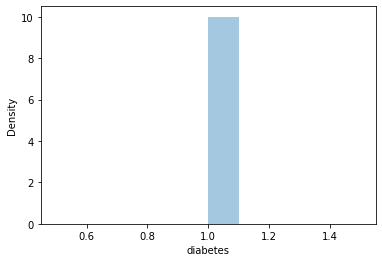

In [23]:
outlier_analysis('diabetes')

count     57.000000
mean     371.228070
std       84.198748
min      107.000000
25%      354.000000
50%      366.000000
75%      390.000000
max      696.000000
Name: totChol, dtype: float64

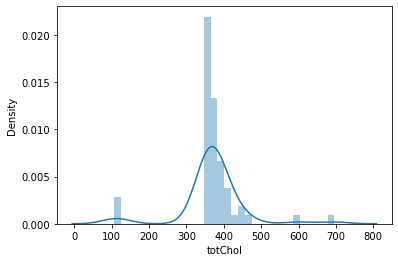

In [24]:
outlier_analysis('totChol')

count    126.000000
mean     199.269841
std       15.270318
min      185.000000
25%      190.000000
50%      195.500000
75%      204.750000
max      295.000000
Name: sysBP, dtype: float64

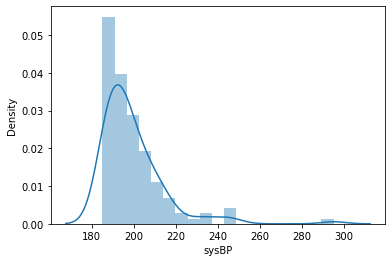

In [25]:
outlier_analysis('sysBP')

count     77.000000
mean     117.123377
std       18.983399
min       48.000000
25%      115.000000
50%      120.000000
75%      125.000000
max      142.500000
Name: diaBP, dtype: float64

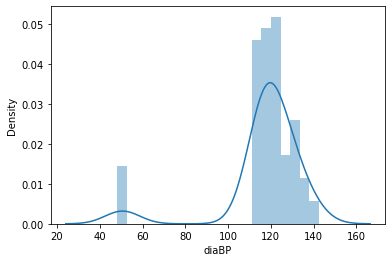

In [26]:
outlier_analysis('diaBP')

count    97.000000
mean     38.972062
std       4.121184
min      15.540000
25%      36.790000
50%      38.540000
75%      40.110000
max      56.800000
Name: BMI, dtype: float64

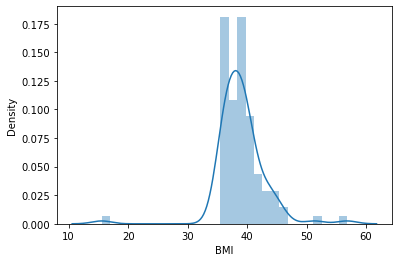

In [27]:
outlier_analysis('BMI')

count     76.000000
mean     110.276316
std       15.094899
min       44.000000
25%      110.000000
50%      110.000000
75%      115.000000
max      143.000000
Name: heartRate, dtype: float64

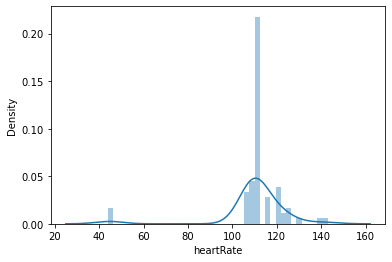

In [28]:
outlier_analysis('heartRate')

count    262.000000
mean     135.729008
std       62.366847
min       40.000000
25%      108.000000
50%      116.000000
75%      137.000000
max      394.000000
Name: glucose, dtype: float64

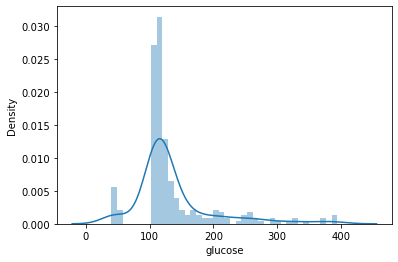

In [29]:
outlier_analysis('glucose')

# Univariate Analysis

Since sex,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes, and Result (This is our target variable) are nominal data

sex: Male(1) or Female(0)
currentSmoker: Whether the paitent is smoker or not. Yes(1) and No(0)
BPMeds: Whether the paitent was on blood pressure medications. Yes(1) and No(0)
prevalentStroke: Whether the paitent had a stroke before. Yes(1) and No(0)
prevalentHyp: Whether the paitent has history of Hypertension. Yes(1) and No(0)
diabetes: Whether the paitent has diabetes. Yes(1) and No(0)
Result:Yes(1) and No(0)

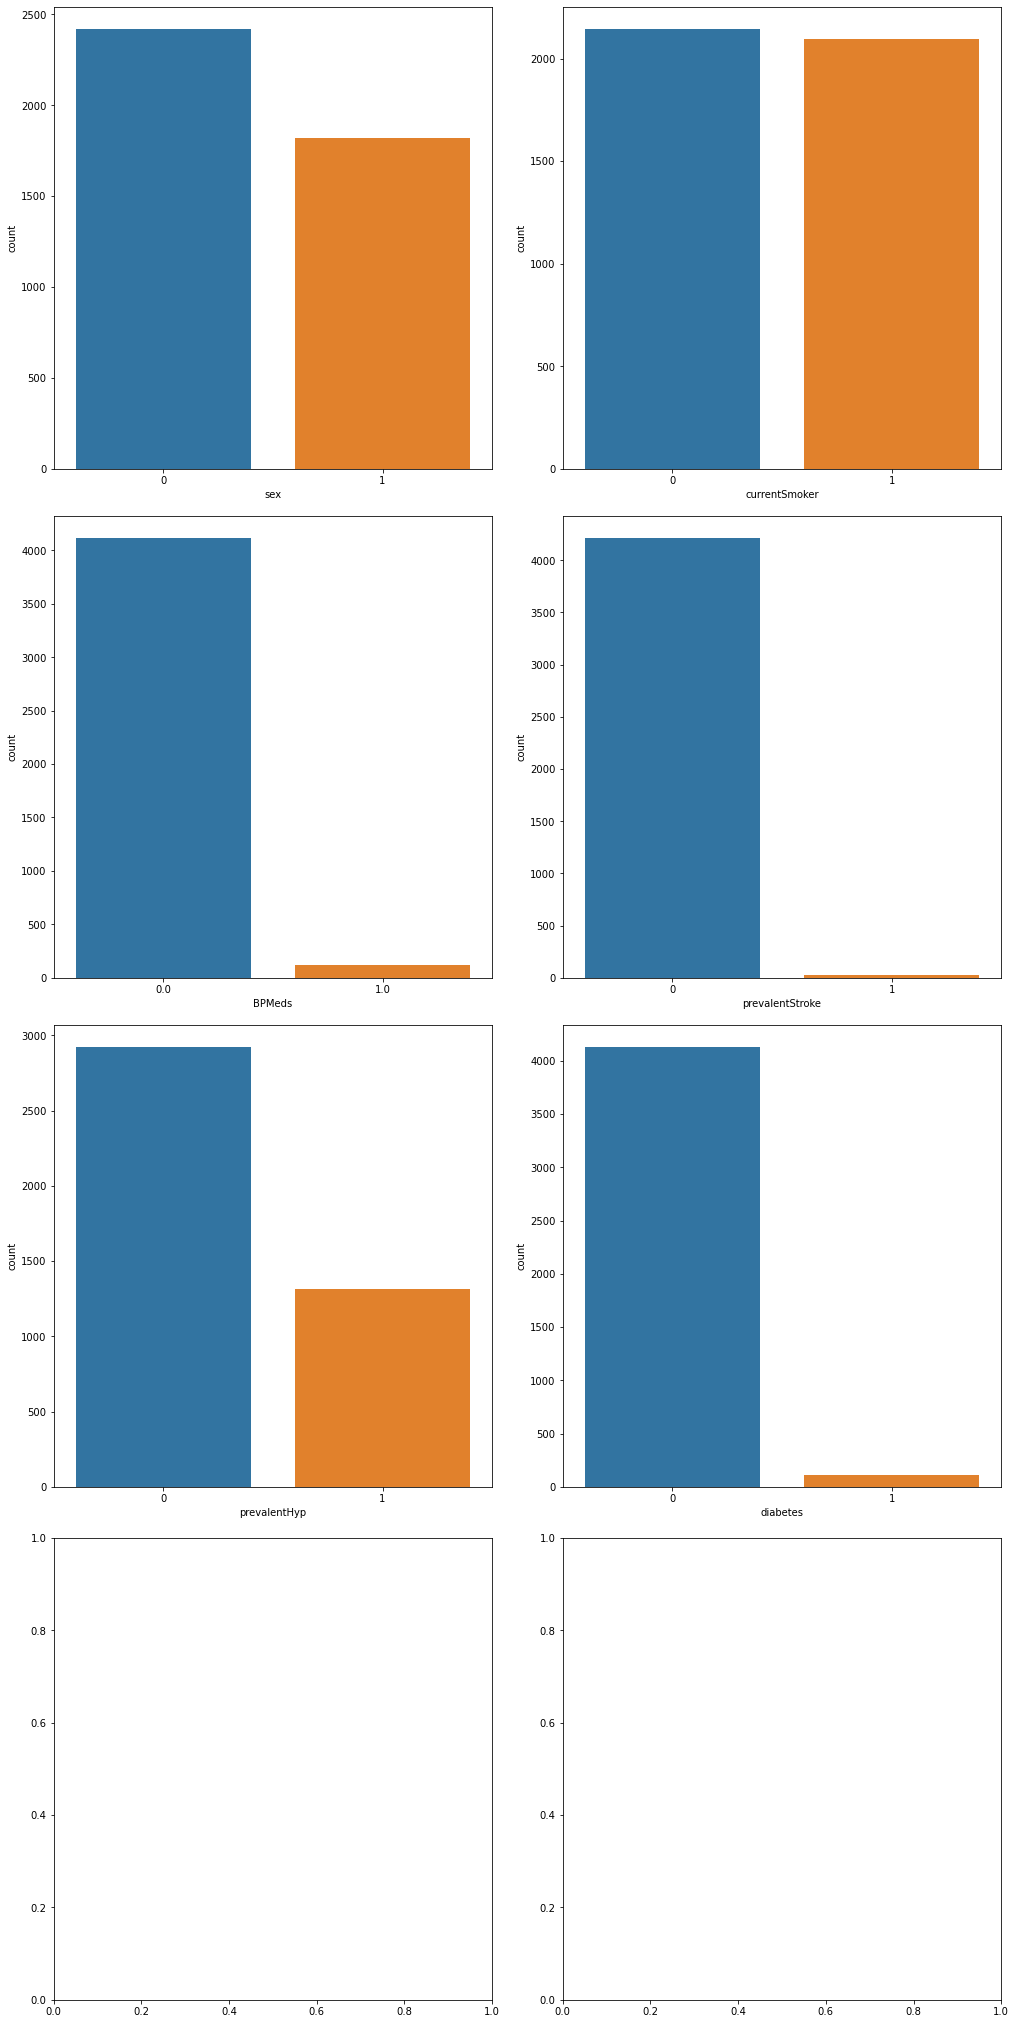

In [30]:
categorical_features = ['sex','currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

BPmeds, prevalentStroke and diabetes are highly imbalanced and the number of Smokers and non-Smokers in currentSmoker is almost the same

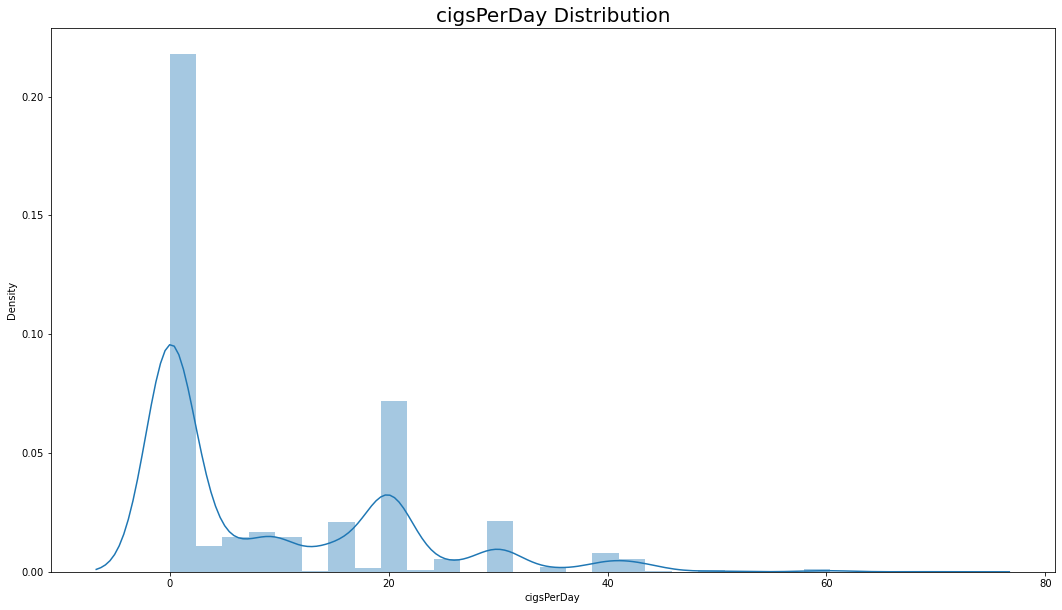

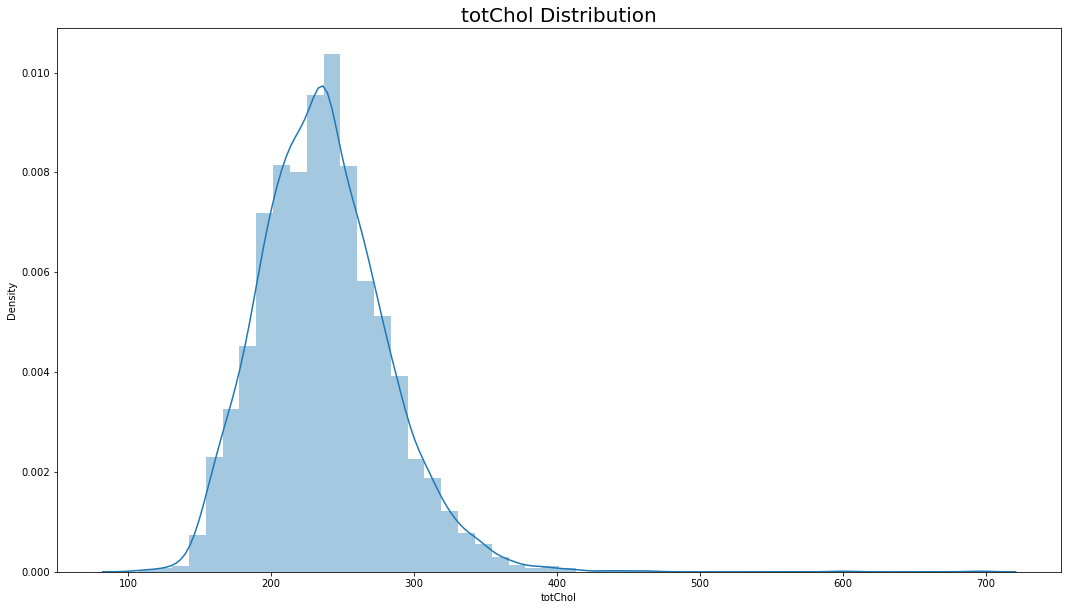

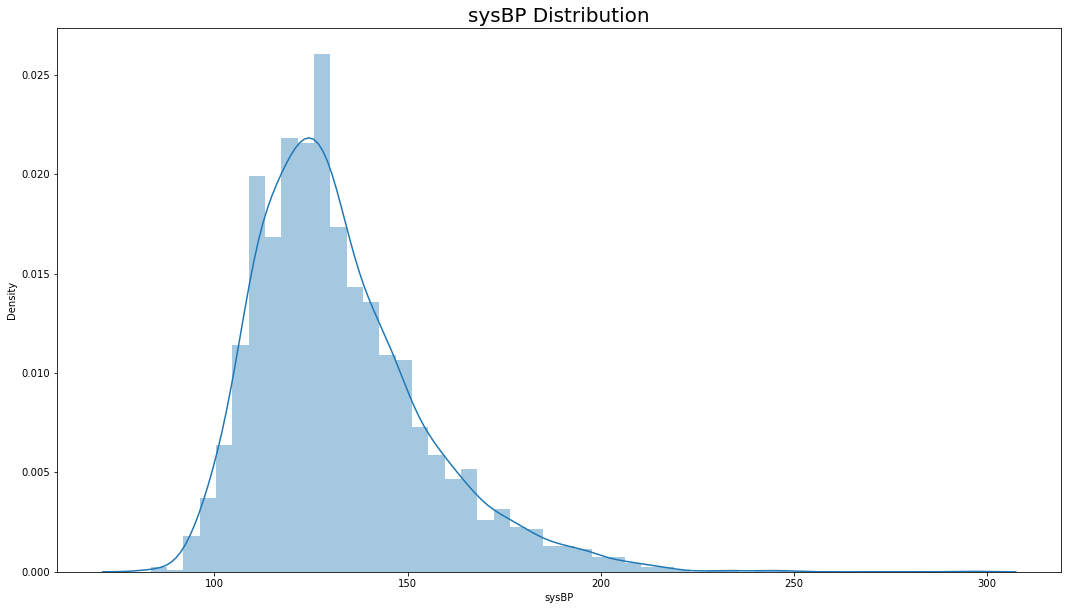

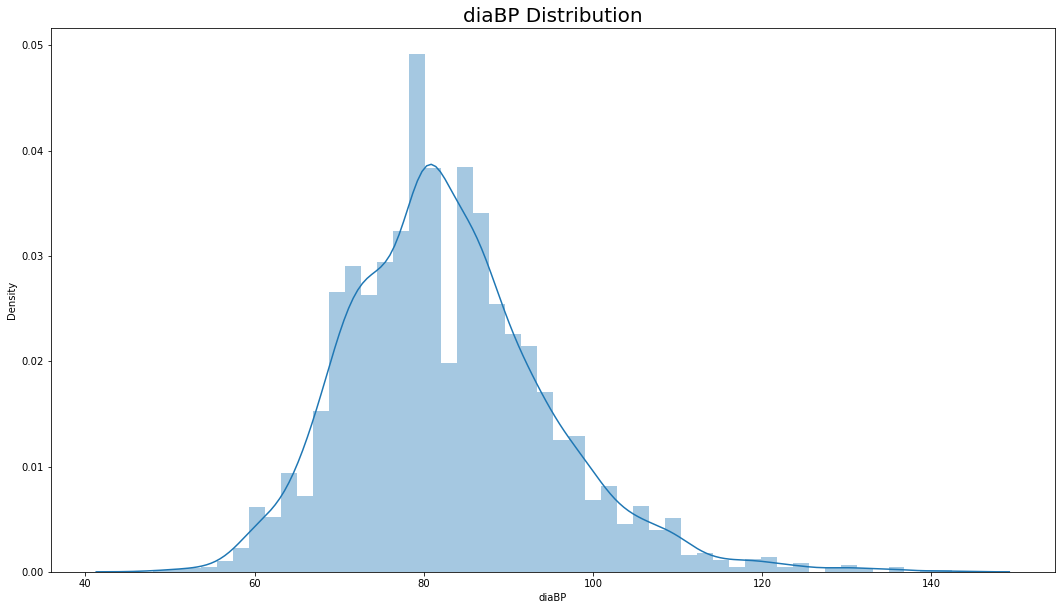

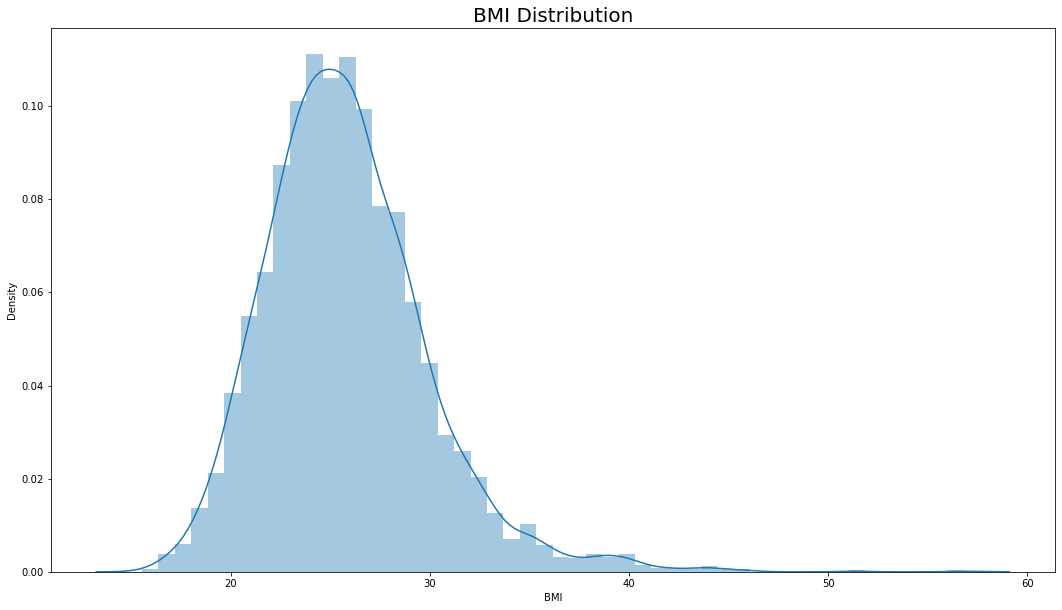

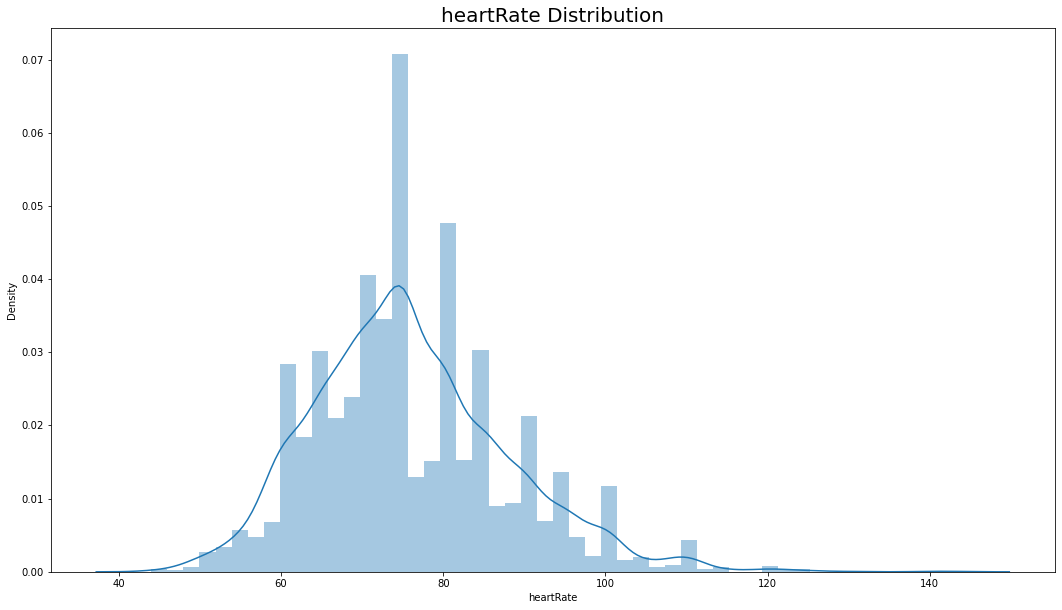

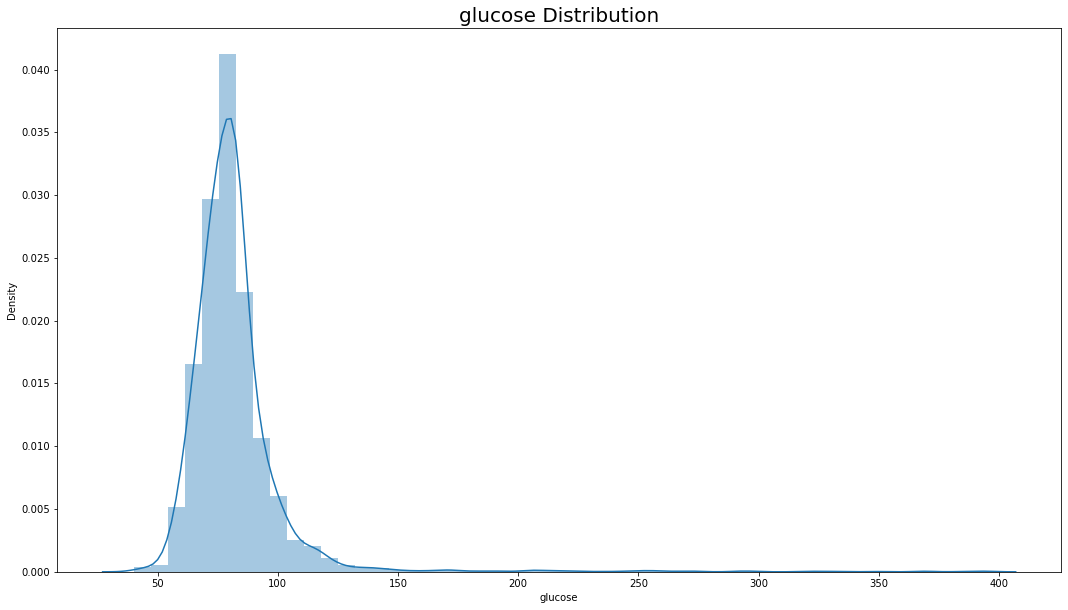

In [31]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

The graphs show that totChol, sysBP, diaBPand BMI has an uniform distribution and the rest are unevenly distributed.

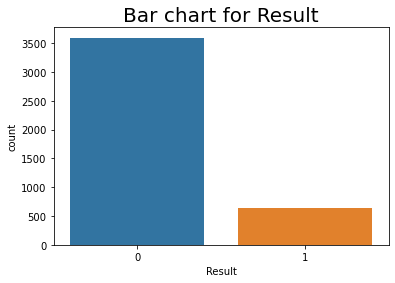

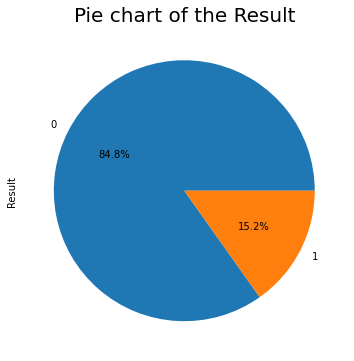

In [32]:
#Countplot
sns.countplot(df['Result'])
plt.title("Bar chart for Result", y=1, fontdict={"fontsize": 20})
plt.figure(figsize=(6,6))
df.Result.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the Result',{'fontsize':20})
plt.show()

The distribution of Result is imbalanced.Negative resilts are way higher tha the Positive result. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be treat, so Let's do resampling

# Resampling

Resampling imbalanced dataset by oversampling positive cases

In [33]:
target1=df[df['Result']==1]
target0=df[df['Result']==0]

In [34]:
from sklearn.utils import resample
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [35]:
target=pd.concat([target0,target1])

In [36]:
target['Result'].value_counts()

1    3596
0    3596
Name: Result, dtype: int64

In [37]:
df=target
np.shape(df)

(7192, 15)

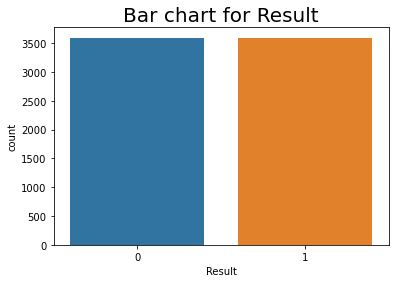

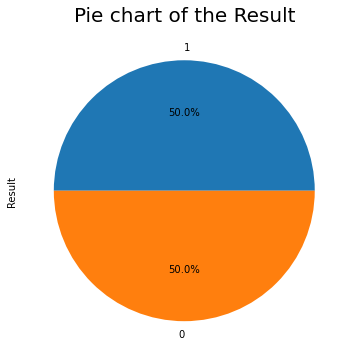

In [38]:
#Countplot
sns.countplot(df['Result'])
plt.title("Bar chart for Result", y=1, fontdict={"fontsize": 20})
plt.figure(figsize=(6,6))
df.Result.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the Result',{'fontsize':20})
plt.show()

The number of positive and negative cases are equal. Hence the classes are now balanced for model fitting

Text(0.5, 1.0, 'Correlation heatmap for the Data')

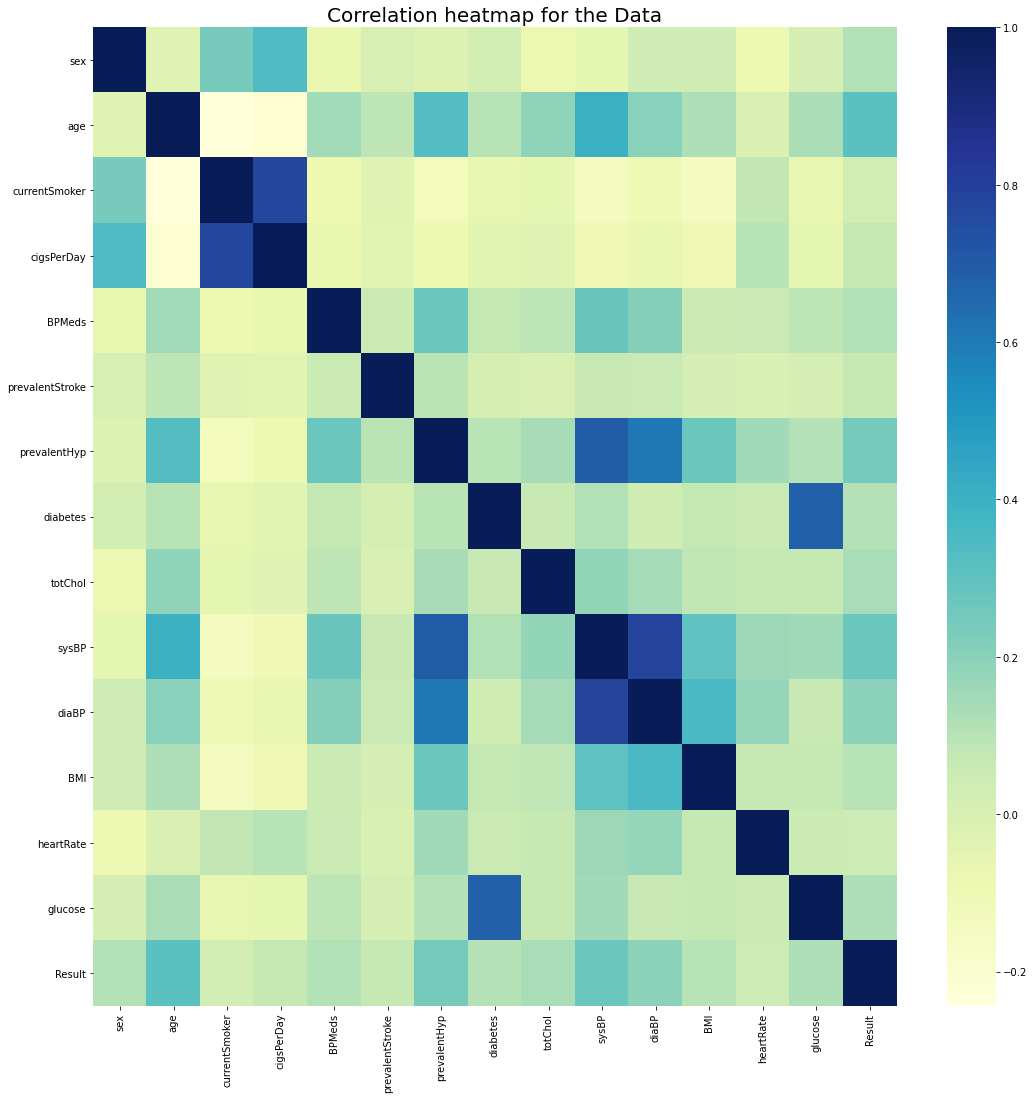

In [39]:
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(df.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

Variables 'currentSmoker' and 'cigsPerDay' are highly correlated.
Variables 'sysBP' and 'diaBP' are highly correlated.

In [40]:
corr_matrix = df.corr()
corr_matrix["Result"].sort_values(ascending=False)

Result             1.000000
age                0.313271
sysBP              0.275386
prevalentHyp       0.242945
diaBP              0.196560
totChol            0.131039
glucose            0.121554
BPMeds             0.113999
sex                0.111487
diabetes           0.110589
BMI                0.103811
cigsPerDay         0.070920
prevalentStroke    0.068939
heartRate          0.044392
currentSmoker      0.026419
Name: Result, dtype: float64

The strongest linear relationship is indicated by a correlation coefficient of -1 or 1. The weakest linear relationship is indicated by a correlation coefficient equal to 0. Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.

In [41]:
df.shape

(7192, 15)

In [42]:
# Create correlation matrix
corr_matrix = df.corr().abs()


In [43]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Result
sex,NaN,0.038998,0.240413,0.343172,0.070340,0.001839,0.023098,0.020989,0.079367,0.050418,0.042473,0.041048,0.090596,0.018181,0.111487
age,NaN,NaN,0.243583,0.212002,0.148286,0.087005,0.331529,0.102031,0.190756,0.405222,0.199203,0.123583,0.005627,0.126115,0.313271
currentSmoker,NaN,NaN,NaN,0.775777,0.086598,0.032497,0.130337,0.061520,0.053985,0.147534,0.105310,0.145357,0.080357,0.066765,0.026419
cigsPerDay,NaN,NaN,NaN,NaN,0.077823,0.042966,0.085064,0.041425,0.033814,0.100982,0.064526,0.101033,0.101466,0.050431,0.070920
BPMeds,NaN,NaN,NaN,NaN,NaN,0.051337,0.275911,0.072579,0.090871,0.279238,0.211473,0.049924,0.062119,0.089962,0.113999
prevalentStroke,NaN,NaN,NaN,NaN,NaN,NaN,0.096106,0.011395,0.006302,0.063184,0.058439,0.018185,0.002182,0.015928,0.068939
prevalentHyp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097661,0.136750,0.695022,0.607137,0.275364,0.152784,0.106213,0.242945
diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063281,0.115261,0.037854,0.075010,0.055412,0.681470,0.110589
totChol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.181990,0.141939,0.084966,0.070881,0.068349,0.131039
sysBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.781637,0.304605,0.160728,0.150447,0.275386


In [44]:
# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.68)]
to_drop

['cigsPerDay', 'sysBP', 'diaBP', 'glucose']

In [45]:
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [46]:
df.shape

(7192, 11)

# Feature Selction

In [47]:
#Shuffle the rows of the dataframe
df = df.sample(frac = 1, random_state=0)

In [48]:
# Attribute and target split
x = df.drop(['Result'], axis=1)#data or Features
y = df[['Result']] #Target or Label
print(x.head())
print(y.head())

      sex  age  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  \
344     0   63              1     0.0                0             0   
3162    1   42              1     0.0                0             0   
4057    0   57              1     1.0                0             1   
1516    1   36              0     0.0                0             0   
2209    0   48              1     0.0                0             0   

      diabetes  totChol    BMI  heartRate  
344          0    238.0  20.20       60.0  
3162         0    234.0  21.88       68.0  
4057         0    272.0  25.15       70.0  
1516         0    219.0  20.86       74.0  
2209         0    237.0  16.61       80.0  
      Result
344        1
3162       1
4057       1
1516       0
2209       1


In [49]:
#Ensuring that all variables are numeric now
x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sex,7192.0,0.466352,0.498901,0.00,0.00,0.00,1.0000,1.0
age,7192.0,51.456897,8.601409,32.00,44.00,51.00,59.0000,70.0
currentSmoker,7192.0,0.503198,0.500025,0.00,0.00,1.00,1.0000,1.0
BPMeds,7192.0,0.047275,0.212241,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,7192.0,0.011123,0.104887,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,7192.0,0.394605,0.488800,0.00,0.00,0.00,1.0000,1.0
diabetes,7192.0,0.041157,0.198667,0.00,0.00,0.00,0.0000,1.0
totChol,7192.0,241.264321,46.522180,107.00,210.00,238.00,268.0000,696.0
BMI,7192.0,26.113999,4.253398,15.54,23.28,25.74,28.4425,56.8
heartRate,7192.0,76.298387,12.072324,44.00,68.00,75.00,83.0000,143.0


Since all values in small range, no need for feature scalling

# Splitting Data set into Train and Test sets

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.30)

70% of data splited as Train and 20% of data goes to test set

In [51]:
x_test.head()

,sex,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate
3627,1,65,1,0.0,0,0,0,215.0,29.08,82.0
170,0,52,0,0.0,0,0,0,235.0,28.86,65.0
985,0,53,1,0.0,0,0,0,300.0,25.46,75.0
1266,1,58,0,0.0,0,0,0,220.0,29.85,75.0
4170,0,41,1,0.0,0,0,0,205.0,20.85,87.0


In [52]:
y_test.head()

,Result
3627,1
170,1
985,1
1266,1
4170,0


# Modeling

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
#Defining Model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [55]:
cross_val_score(LogisticRegression(),x,y,cv=4).mean()

0.6618464961067854

The Logistic model is statistically good but not very good

In [56]:
# Predicting the values for x-test
y_pred = model.predict(x_test)

In [57]:
#finding the training and testing accuracy
print ("Training Accuracy: ",model.score(x_train,y_train))
print ("Testing Accuracy: ",model.score(x_test,y_test))

Training Accuracy:  0.655145013905443
Testing Accuracy:  0.6686746987951807


the training accuracy is the accuracy of the model apply on the training data, which is 0.66 and testing Accuracy is the accuracy for the testing data, which is 0.66.

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[750, 359],
       [356, 693]], dtype=int64)

In [59]:
#Let's look at some other scores as well
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1109
           1       0.66      0.66      0.66      1049

    accuracy                           0.67      2158
   macro avg       0.67      0.67      0.67      2158
weighted avg       0.67      0.67      0.67      2158



In [60]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix

In [61]:
accuracy_score(y_test,y_pred)

0.6686746987951807

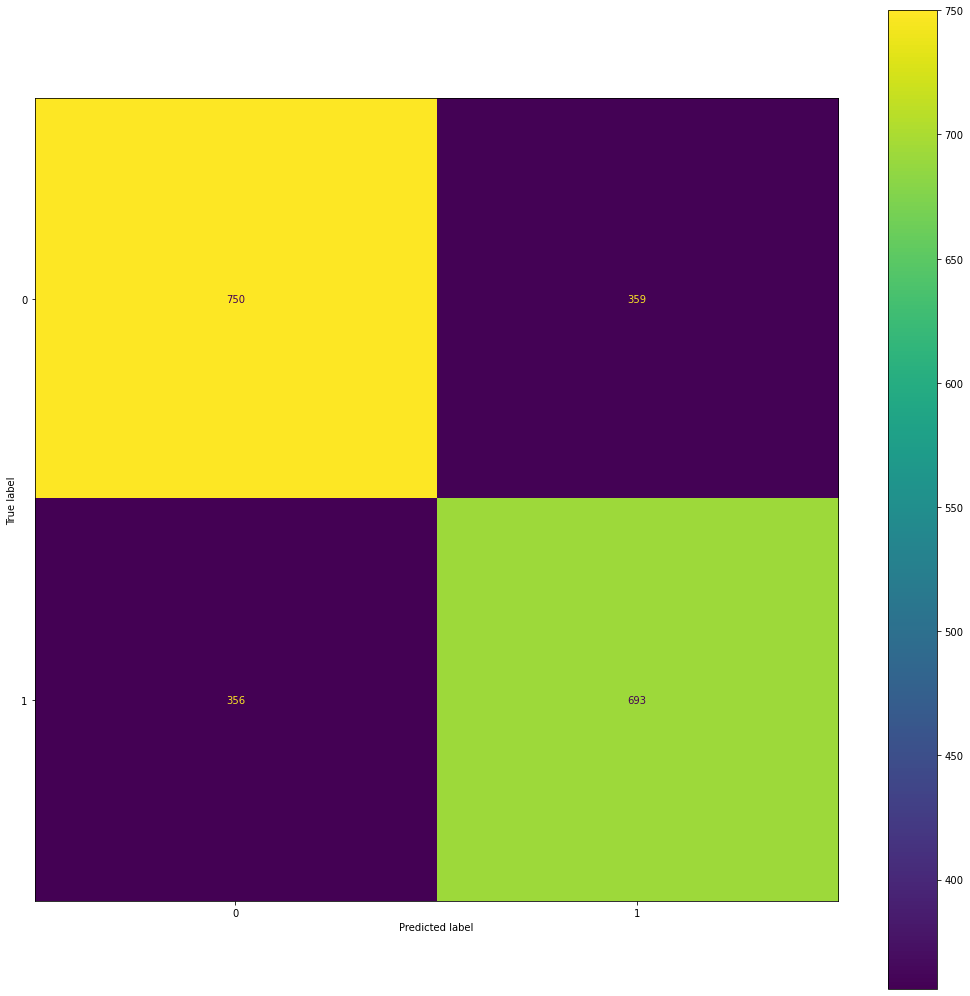

In [62]:
plot_confusion_matrix(model,x_test,y_test)

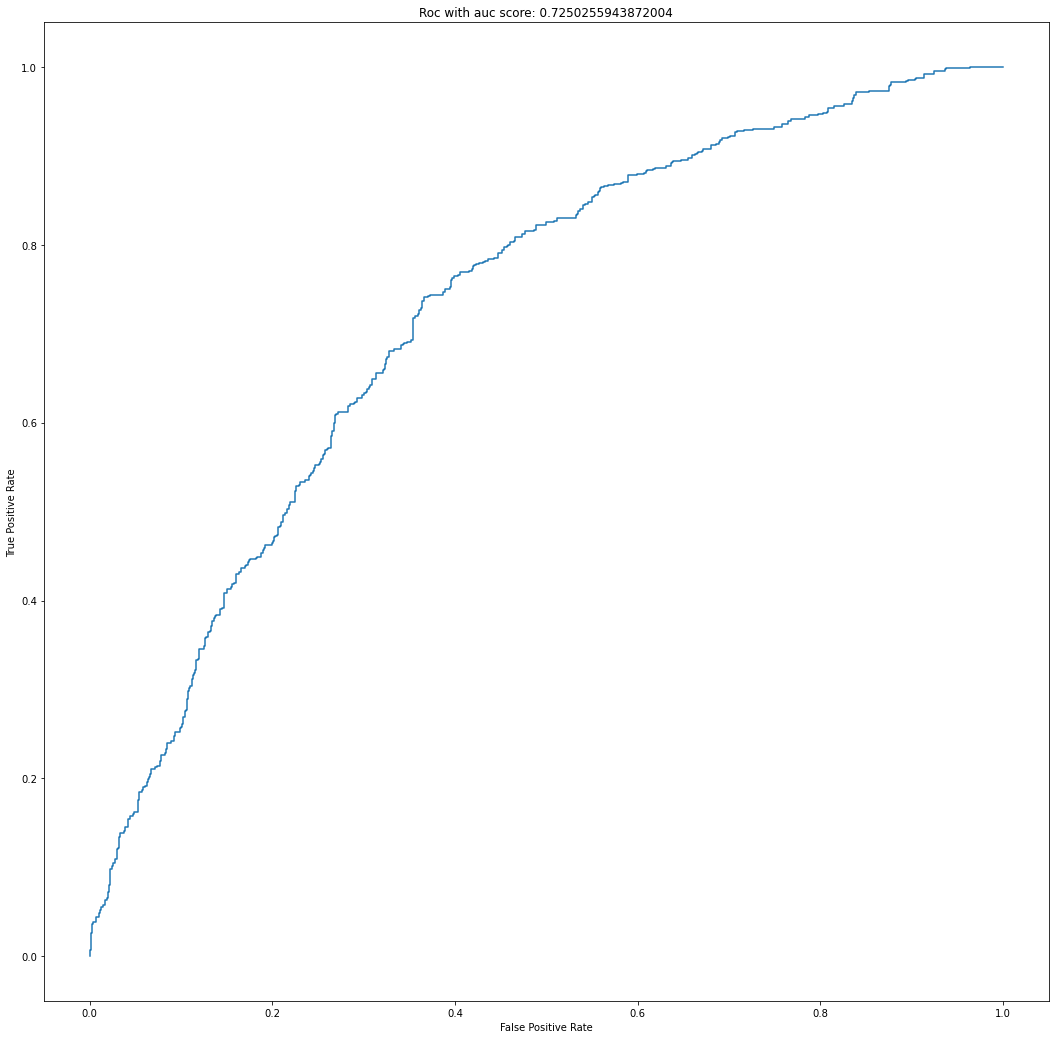

In [63]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

In [64]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(x_train,y_train)
y_pred = clf.predict(x_test)

# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.6686746987951807
Precision Score : 0.658745247148289
Recall Score : 0.6606291706387035
F1 Score : 0.6596858638743456
Confusion Matrix : 
[[750 359]
 [356 693]]


AUC is an excellent performance measure for Logistic Regression Model as it is robust against probability threshold values and truly depicts if the model is good or not for the data at hand. The closer the score to 1, the better. The score is 0.7232, it means that Logistic Regression is  fit for the data but still we look for other models, 

# KNN

In [90]:
#import the knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [91]:
#see the cross_validated score for cv=3
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x,y,cv=3).mean()

0.7536158336183597

In [92]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores = []
for i in range(1,11,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,x,y,cv=3).mean())

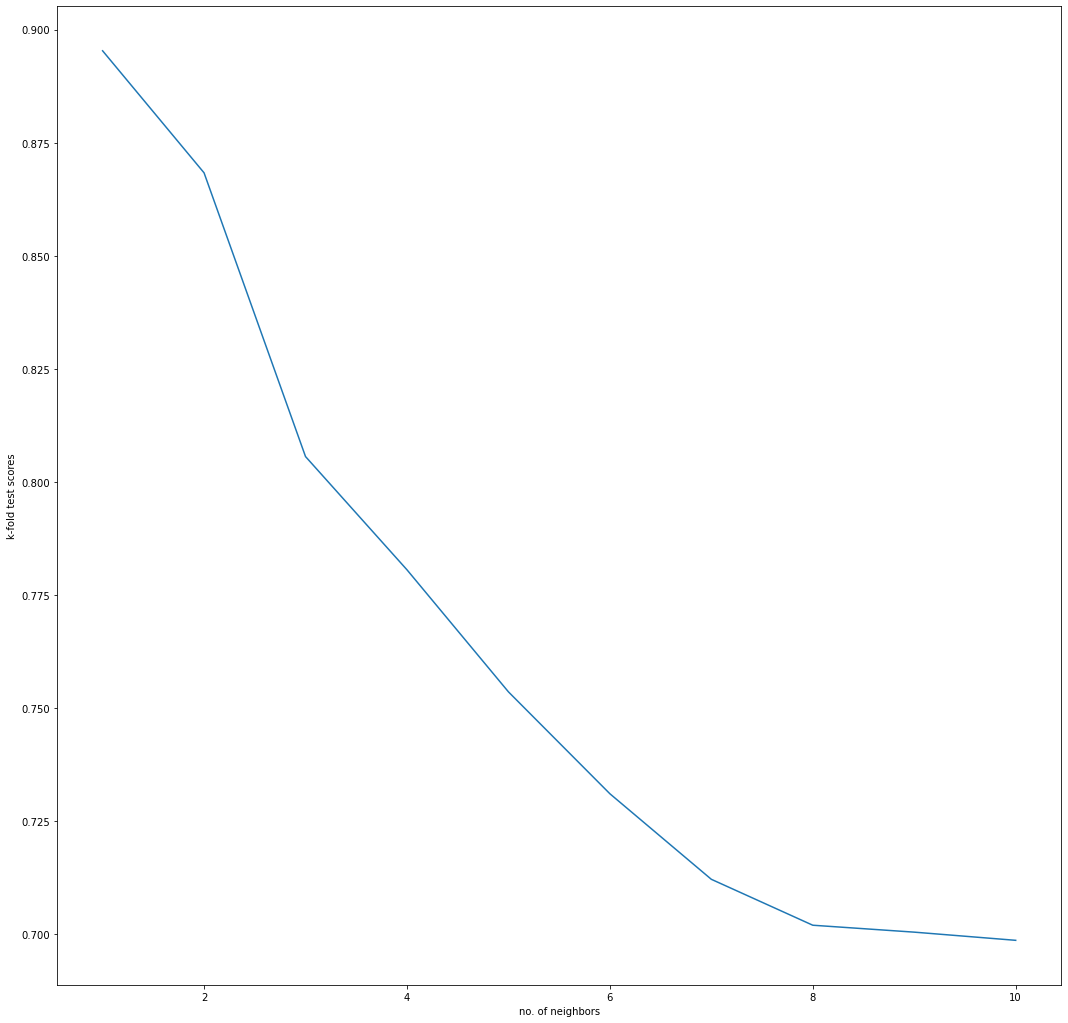

In [93]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()


In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
#Training the model.
knn.fit(x_train, y_train)
#Predict test data set.
y_pred = knn.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.65      0.74      1109
           1       0.71      0.88      0.78      1049

    accuracy                           0.76      2158
   macro avg       0.78      0.77      0.76      2158
weighted avg       0.78      0.76      0.76      2158



0.7668396454693851

# Using Hyperparameter

In [95]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [96]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.65      0.74      1109
           1       0.71      0.88      0.78      1049

    accuracy                           0.76      2158
   macro avg       0.78      0.77      0.76      2158
weighted avg       0.78      0.76      0.76      2158



0.7668396454693851

# Random forest

In [71]:
# Predicting using the Random forest

from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=101, random_state=10)

model= model.fit(x_train,y_train)

y_pred= model.predict(x_test)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm_RF=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cfm_RF)
print()

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc_RF=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc_RF)

Confusion Matrix: 
[[ 986  123]
 [  17 1032]]

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1109
           1       0.89      0.98      0.94      1049

    accuracy                           0.94      2158
   macro avg       0.94      0.94      0.94      2158
weighted avg       0.94      0.94      0.94      2158

Accuracy of the model:  0.9351251158480074


# Adaboost

In [84]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [85]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [86]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6890639481000926


Score is good and good model

# SVM

In [78]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [79]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6807228915662651


In [80]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.6592920353982301
Recall: 0.7102001906577693


In [ ]:
#----------------OR----------------------------

In [ ]:
#from sklearn.svm import SVC

#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#clf = SVC(random_state=42)

#param_grid = { 
#    'kernel': ['linear', 'rbf', 'sigmoid'],
#    'degree': [2, 3, 4, 5, 6],
#    'gamma' : ['scale', 'auto']
#}

#gscv_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
#gscv_clf.fit(x_train, y_train)

In [ ]:
#from sklearn.metrics import accuracy_score
#predicted = svc.predict(x_test)
#    actual = test_labels
#    score = svc.score(x_test, x_train)
#    print ('svc score')

In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

Above code, I tried multiple kernal(linear,rbf,sigmoid) to run but it taking too long to give result. 

Logistic Regression:  0.668
Knn:0.76
RandomForest : 0.94  
AdaBoost : 0.689
SVM : 0.659
Conclusion : RandomForest is a best model compare to other models.